Download the data

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip the all file

In [11]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
import zipfile
zip_ref=zipfile.ZipFile('/content/test1.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
import zipfile
zip_ref=zipfile.ZipFile('/content/train.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers,optimizers
import numpy as np
from matplotlib import pyplot

Cleaning Dataset- convert dogs and cats images into specific dogs and cats folder and also split into training and validation

In [13]:
import os
import shutil
source_folder = "/content/train"
cat_folder = "/content/cat"
dog_folder = "/content/dog"

os.makedirs(cat_folder, exist_ok=True)
os.makedirs(dog_folder, exist_ok=True)

for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        if "cat" in filename:
            shutil.copy(os.path.join(source_folder, filename), cat_folder)
        elif "dog" in filename:
            shutil.copy(os.path.join(source_folder, filename), dog_folder)

In [18]:
import os
import shutil

root_dir = '/content/training'

cats_dir = os.path.join('/content/', 'cat')
dogs_dir = os.path.join('/content/', 'dog')

train_dir = os.path.join(root_dir, 'trainn')
valid_dir = os.path.join(root_dir, 'validd')

if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(valid_dir):
    os.mkdir(valid_dir)
train_percent = 0.8

cat_files = os.listdir(cats_dir)
num_cat_train = int(len(cat_files) * train_percent)
for i, cat_file in enumerate(cat_files):
    src = os.path.join(cats_dir, cat_file)
    if i < num_cat_train:
        dst = os.path.join('/content/training/trainn/cats', cat_file)
    else:
        dst = os.path.join('/content/training/validd/cats', cat_file)
    shutil.copy(src, dst)

dog_files = os.listdir(dogs_dir)
num_dog_train = int(len(dog_files) * train_percent)
for i, dog_file in enumerate(dog_files):
    src = os.path.join(dogs_dir, dog_file)
    if i < num_dog_train:
        dst = os.path.join('/content/training/trainn/dogs', dog_file)
    else:
        dst = os.path.join('/content/training/validd/dogs', dog_file)
    shutil.copy(src, dst)


In [19]:
train_path='/content/training/trainn'
valid_path='/content/training/validd'
test_path='/content/testing'

In [20]:
datagen1 = ImageDataGenerator(rescale=1./255)
train_batches = datagen1.flow_from_directory(
    '/content/training/trainn',
    target_size=(256,256),
    classes=['cats', 'dogs'],
    batch_size=32
)

datagen2 = ImageDataGenerator(rescale=1./255)
valid_batches = datagen2.flow_from_directory(
    '/content/training/validd',
    target_size=(256,256),
    classes=['cats', 'dogs'],
    batch_size=32
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [21]:
class_names = list(train_batches.class_indices.keys())
print("Class names:", class_names)

Class names: ['cats', 'dogs']


In [22]:
class_names = list(valid_batches.class_indices.keys())
print("Class names:", class_names)

Class names: ['cats', 'dogs']


Model Initializer

In [ ]:
base_hidden_units=32
weight_decay=1e-4
model=Sequential()

model.add(Conv2D(base_hidden_units,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay),
                input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(base_hidden_units*2,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(base_hidden_units*3,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(base_hidden_units*3,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(base_hidden_units*3,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(base_hidden_units*4,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 activation_7 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 batch_normalization_7 (Batc  (None, 256, 256, 64)     256       
 hNormalization)                                      

Train the model

In [ ]:
from keras.optimizers import Adam
model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_batches,validation_data=valid_batches,epochs=20)

Epoch 1/20
625/625 [==============================] - 363s 579ms/step - loss: 0.7534 - accuracy: 0.6525 - val_loss: 15.7719 - val_accuracy: 0.5916
Epoch 2/20
625/625 [==============================] - 364s 582ms/step - loss: 0.6218 - accuracy: 0.7147 - val_loss: 7.1621 - val_accuracy: 0.6298
Epoch 3/20
625/625 [==============================] - 362s 580ms/step - loss: 0.5561 - accuracy: 0.7517 - val_loss: 1.9100 - val_accuracy: 0.6796
Epoch 4/20
625/625 [==============================] - 363s 580ms/step - loss: 0.5052 - accuracy: 0.7861 - val_loss: 1.1882 - val_accuracy: 0.6946
Epoch 5/20
625/625 [==============================] - 365s 583ms/step - loss: 0.4485 - accuracy: 0.8170 - val_loss: 0.8761 - val_accuracy: 0.7496
Epoch 6/20
625/625 [==============================] - 364s 582ms/step - loss: 0.4119 - accuracy: 0.8384 - val_loss: 0.6493 - val_accuracy: 0.7572
Epoch 7/20
625/625 [==============================] - 364s 582ms/step - loss: 0.3708 - accuracy: 0.8584 - val_loss: 0.6856 

Save the model

In [ ]:
model.save('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

visualize between train and validation accuracy

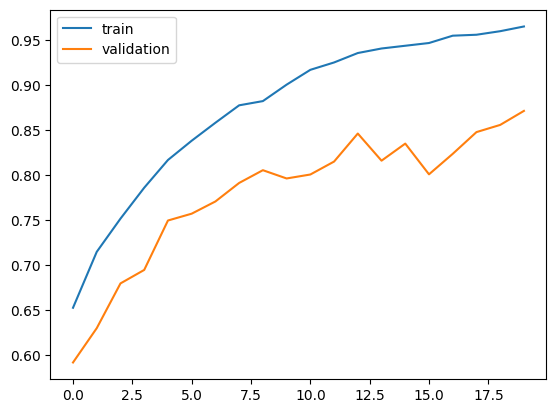

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()


Testing on 45 images

1/1 [==============================] - 0s 229ms/step


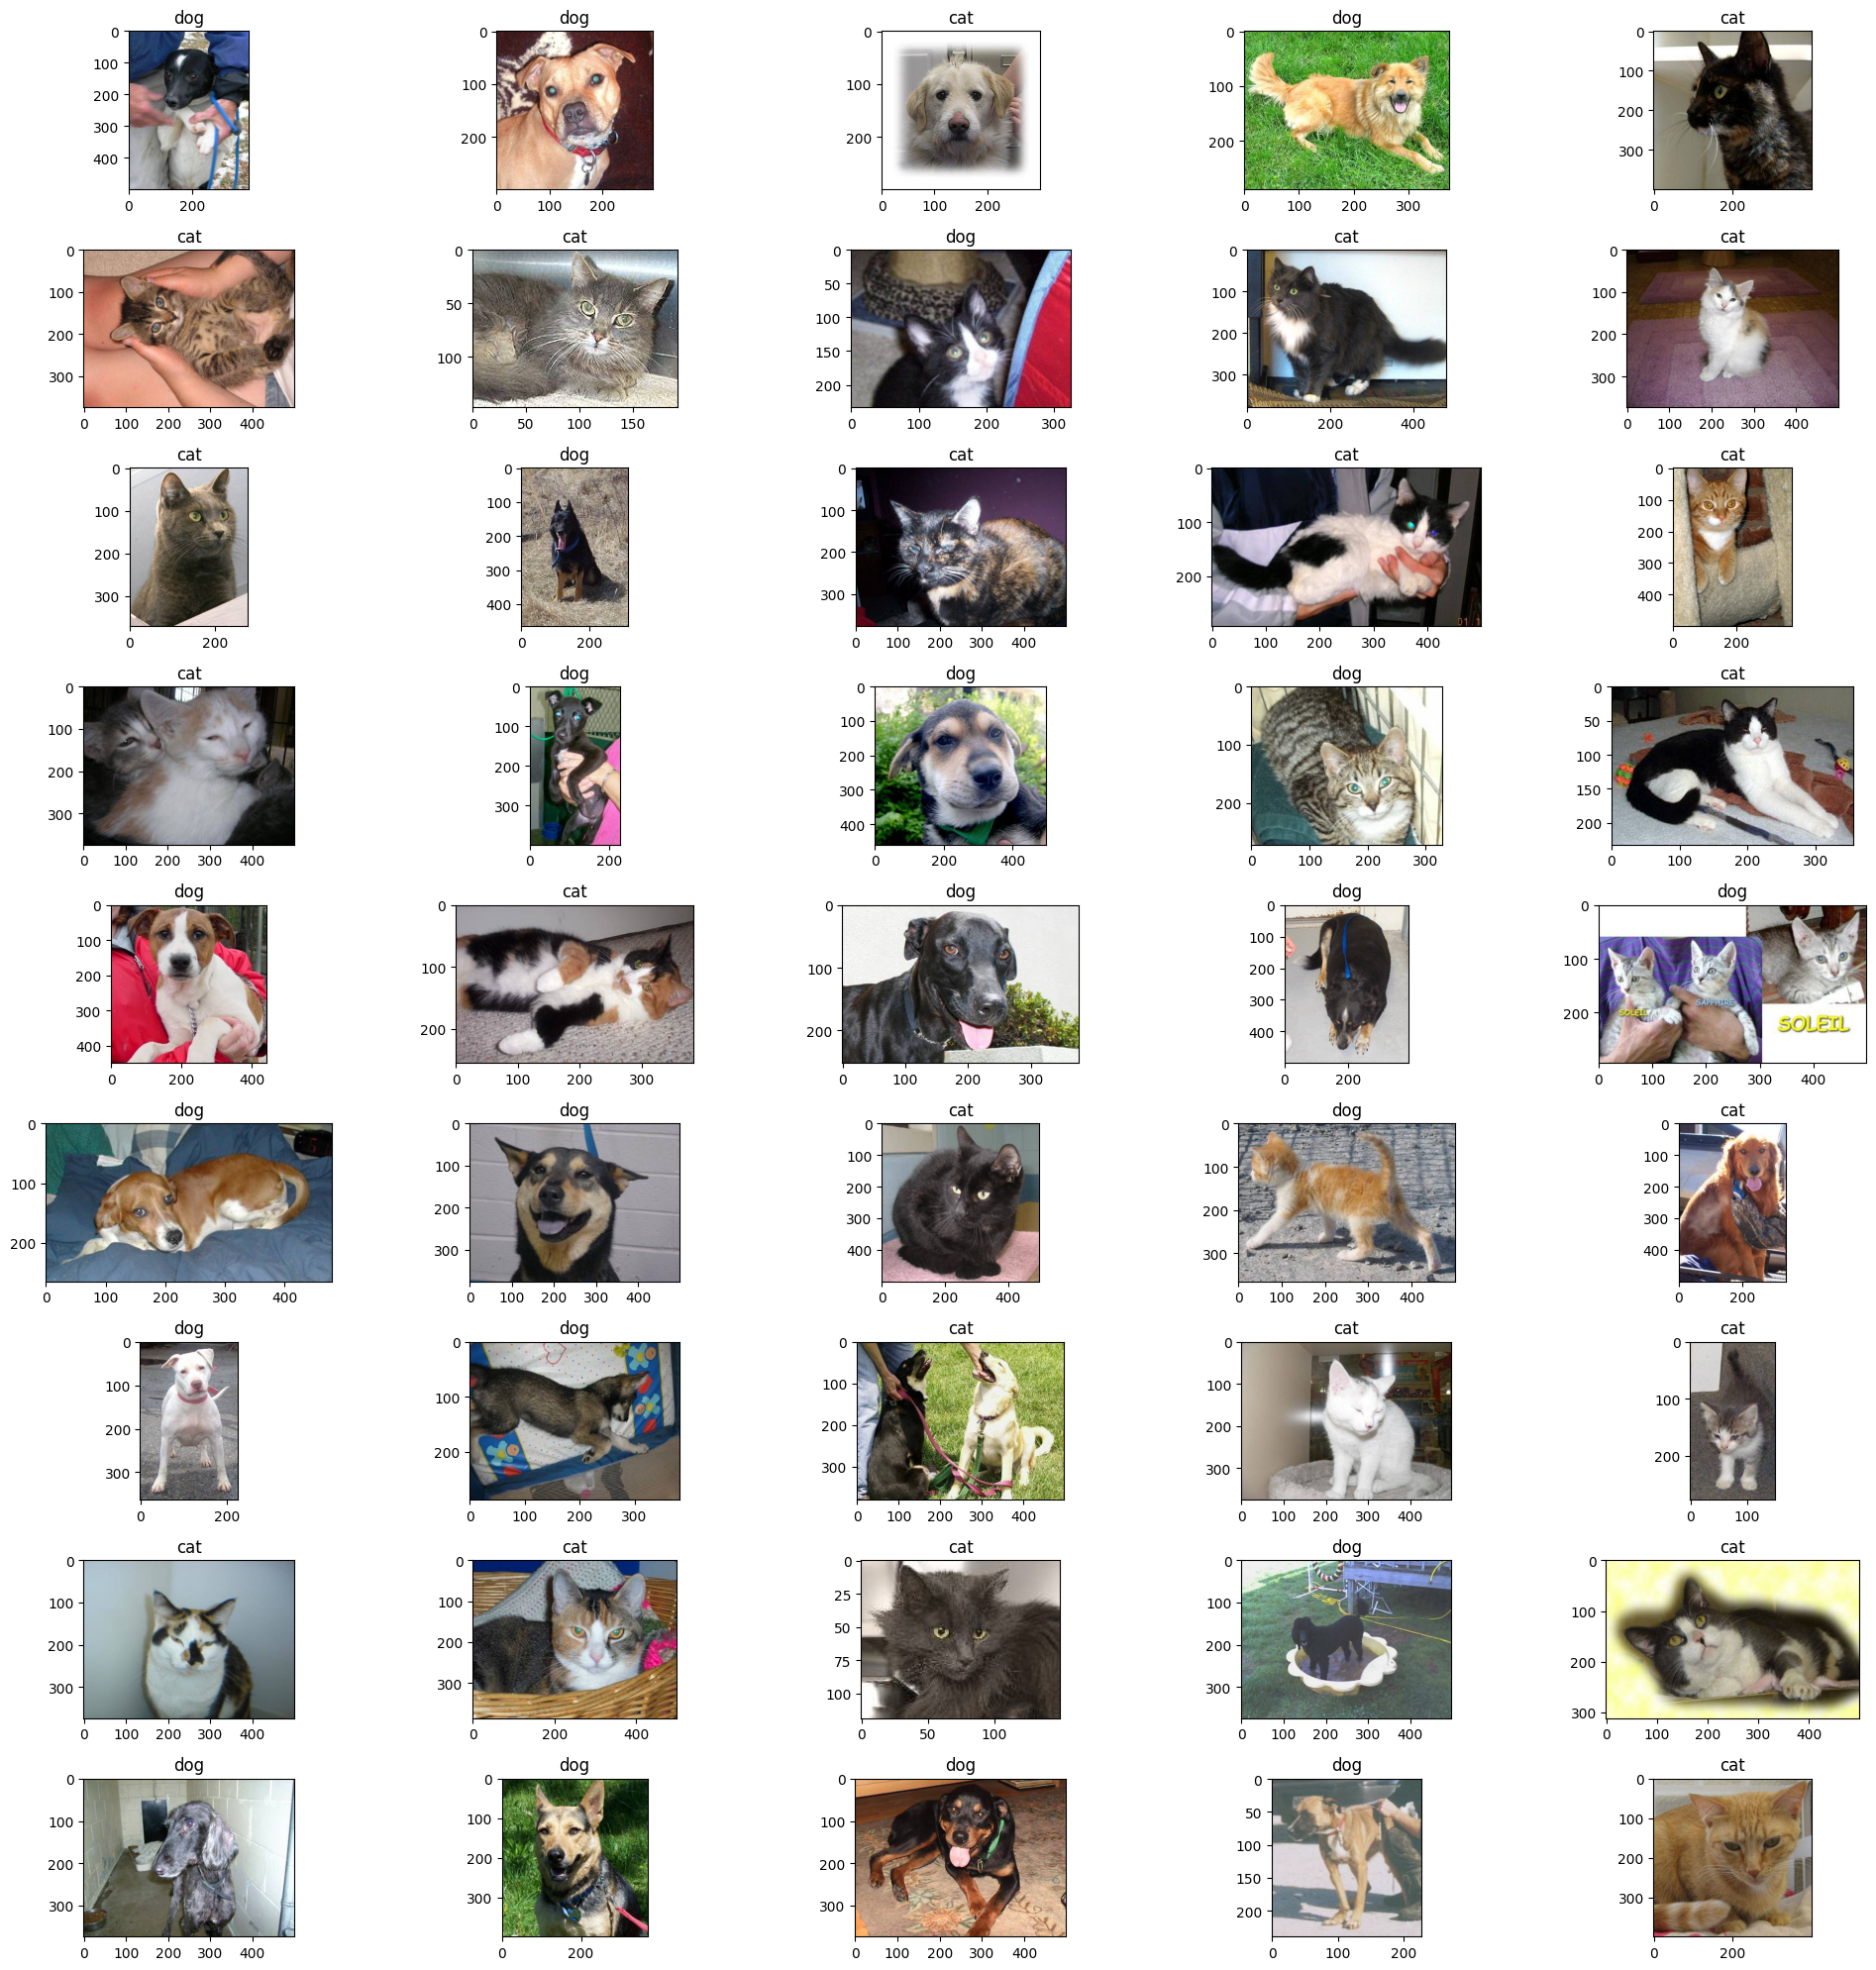

In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt

model = load_model('/content/my_model.h5')

class_labels = ['cat', 'dog']

fig = plt.figure(figsize=(20, 20))

for i in range(1, 46):
    img_path = f'/content/test1/{i}.jpg'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.reshape(img, (1, 256, 256, 3))
    probs = model.predict(img)
    class_idx = np.argmax(probs)
    class_label = class_labels[class_idx]
    ax = fig.add_subplot(9, 5, i)
    ax.set_title(class_label)
    ax.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    
plt.tight_layout()
plt.show()